# LENS analysis

an example for a LENS analysis as in the [original paper](https://doi.org/10.48550/arXiv.2212.12694)

extra requirements:
```
matplotlib
```

In [1]:
import SOAPify.HDF5er as HDF5er
import SOAPify
import h5py
import matplotlib.pyplot as plt
cutoff=2.88*1.1

## Load data

Let's get the data:
```bash
wget https://github.com/GMPavanLab/dynNP/releases/download/V1.0-trajectories/ico309.hdf5
```
We'll start by caclulating the neighbours and the LENS parameters

using cutoff=2.88*1.1 that is 10% more than the Au radius step

In [2]:
with h5py.File("ico309.hdf5",'r') as trajFile:
    tgroup=trajFile['/Trajectories/ico309-SV_18631-SL_31922-T_300']
    universe=HDF5er.createUniverseFromSlice(tgroup,slice(0,None,10))


In [3]:
neigCounts=SOAPify.analysis.listNeighboursAlongTrajectory(
            universe, cutOff=cutoff
        )

In [15]:
LENS,nn, *_ = SOAPify.analysis.neighbourChangeInTime(
        neigCounts
    )

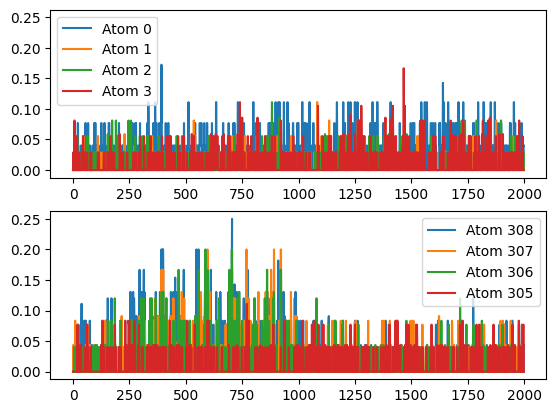

In [14]:
fig, axes =  plt.subplots(2, sharey=True)
for i in range(4):
    axes[0].plot(LENS[i],label=f"Atom {i}")
    axes[1].plot(LENS[308-i],label=f"Atom {308-i}")

for ax in axes:
    ax.legend()

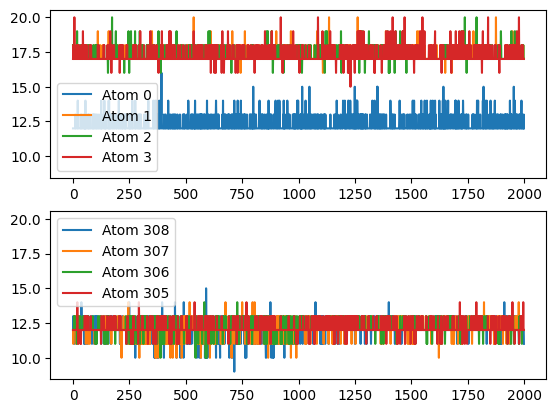

In [16]:
fig, axes =  plt.subplots(2, sharey=True)
for i in range(4):
    axes[0].plot(nn[i],label=f"Atom {i}")
    axes[1].plot(nn[308-i],label=f"Atom {308-i}")

for ax in axes:
    ax.legend()